<a href="https://colab.research.google.com/github/4juneko/Aiffel_work/blob/master/15_faceLandMark_05242023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rubric
|ÌèâÍ∞ÄÎ¨∏Ìï≠|	ÏÉÅÏÑ∏Í∏∞Ï§Ä|ÎÇ¥ ÌèâÍ∞Ä|
|--|--|--|
|1. ÏûêÍ∏∞ÎßåÏùò Ïπ¥Î©îÎùºÏï± Í∏∞Îä• Íµ¨ÌòÑÏùÑ ÏôÑÏàòÌïòÏòÄÎã§.	|ÏñºÍµ¥ ÏòÅÏó≠Í≥º ÎûúÎìúÎßàÌÅ¨Î•º Ï†ïÌôïÌïòÍ≤å Í≤ÄÏ∂úÌïòÍ≥†, Ïä§Ìã∞Ïª§ ÏÇ¨ÏßÑÏùÑ Ìï©ÏÑ±ÏãúÌÇ§Îäî Îç∞ ÏÑ±Í≥µÌïòÏòÄÎã§.|O|
|2. Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Ï†ïÌôïÌïú ÏõêÎ≥∏ ÏúÑÏπòÏóê Î∞òÏòÅÌïòÏòÄÎã§.	|Ï†ïÌôïÌïú Ï¢åÌëúÍ≥ÑÏÇ∞ÏùÑ ÌÜµÌï¥ Í≥†ÏñëÏù¥ ÏàòÏóºÏùò ÏúÑÏπòÍ∞Ä ÏõêÎ≥∏ ÏñºÍµ¥Ïóê Ïûò Ïñ¥Ïö∏Î¶¨Í≤å Ï∂úÎ†•ÎêòÏóàÎã§.|O|
|3. Ïπ¥Î©îÎùº Ïä§Ìã∞Ïª§Ïï±ÏùÑ Îã§ÏñëÌïú ÏõêÎ≥∏Ïù¥ÎØ∏ÏßÄÏóê Ï†ÅÏö©ÌñàÏùÑ ÎïåÏùò Î¨∏Ï†úÏ†êÏùÑ Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú Î∂ÑÏÑùÌïòÏòÄÎã§.	|ÏñºÍµ¥Í∞ÅÎèÑ, Ïù¥ÎØ∏ÏßÄ Î∞ùÍ∏∞, Ï¥¨ÏòÅÍ±∞Î¶¨ Îì± Îã§ÏñëÌïú Î≥ÄÏàòÏóê Îî∞Î•∏ ÏòÅÌñ•ÎèÑÎ•º Î≥¥Í≥†ÏÑúÏóê Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú Î∂ÑÏÑùÌïòÏòÄÎã§.|OX|


In [ ]:
import cv2
import dlib
import os
import matplotlib.pyplot as plt
import numpy as np

print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


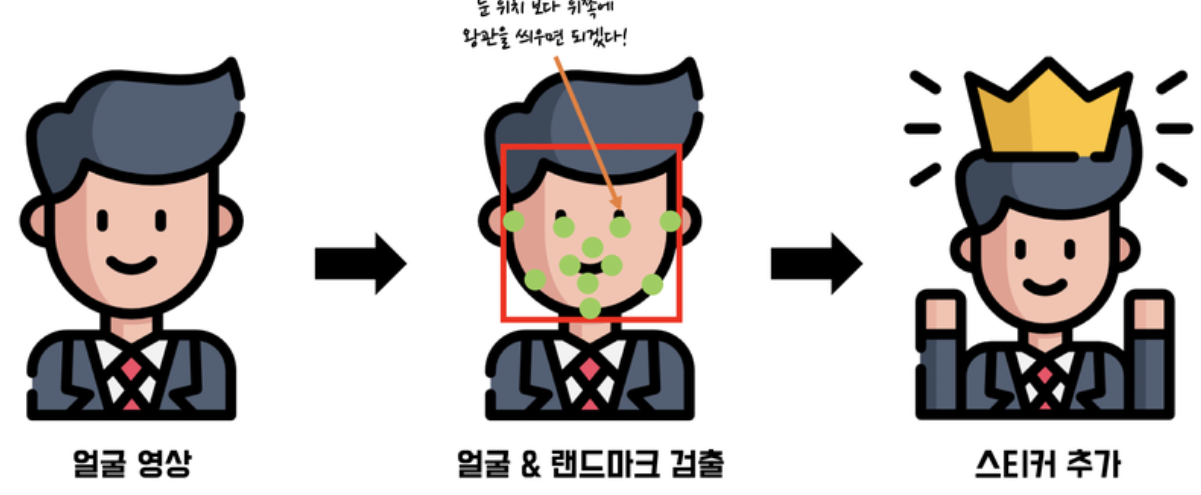

# Attach Sticker

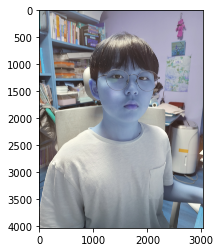

In [ ]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/13.jpg' # Î≥∏Ïù∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäî Í≤ΩÎ°úÎ•º Í∞ÄÏßÄÍ≥† Ïò®Îã§.
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§|

plt.imshow(img_bgr) # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ Ï∂úÎ†•Ìï† Ïù¥ÎØ∏ÏßÄÎ•º Ïò¨Î†§Ï§ÄÎã§. (Ïã§Ï†ú Ï∂úÎ†•ÏùÄ ÌïòÏßÄ ÏïäÏùå)
plt.show() # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•Ìï¥Ï§ÄÎã§. (Ïã§Ï†ú Ï∂úÎ†•)

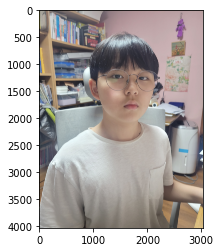

In [ ]:
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏùÑ ÏûäÏßÄÎßàÏÑ∏Ïöî. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # Ïù¥ÎØ∏ÏßÄ Ïã§Ï†ú Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ Ïù¥ÎØ∏ÏßÄÎ•º Ïò¨Î†§Ï§å (ÏõêÌïòÎäî ÏÇ¨Ïù¥Ï¶àÏùò ÌîΩÏÖÄÏùÑ ÏõêÌïòÎäî ÏÉâÏúºÎ°ú Ï±ÑÏõåÏÑú ÎßåÎì† Í∑∏Î¶ºÏù¥ÎùºÍ≥† Ìï©ÎãàÎã§.)
plt.show() # Ïù¥ÎØ∏ÏßÄ Ïã§Ï†ú Ï∂úÎ†•

In [ ]:
# detectorÎ•º ÏÑ†Ïñ∏Ìï©ÎãàÎã§
detector_hog = dlib.get_frontal_face_detector() # Í∏∞Î≥∏ ÏñºÍµ¥ Í∞êÏßÄÍ∏∞Î•º Î∞òÌôò
print("üå´üõ∏")

üå´üõ∏


In [ ]:
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("üå´üõ∏")

üå´üõ∏


rectangles[[(1124, 997) (2274, 2147)]]


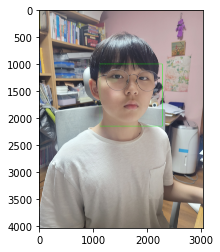

In [ ]:
# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ Î¶¨Ïä§Ìä∏
# Ïó¨Îü¨ ÏñºÍµ¥Ïù¥ ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§
print(dlib_rects)   

for dlib_rect in dlib_rects: # Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠Ïùò Ï¢åÌëú
    l = dlib_rect.left() # ÏôºÏ™Ω
    t = dlib_rect.top() # ÏúÑÏ™Ω
    r = dlib_rect.right() # Ïò§Î•∏Ï™Ω
    b = dlib_rect.bottom() # ÏïÑÎûòÏ™Ω

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 4, lineType=cv2.LINE_AA) # ÏãúÏûëÏ†êÏùò Ï¢åÌëúÏôÄ Ï¢ÖÎ£åÏ†ê Ï¢åÌëúÎ°ú ÏßÅÍ∞Å ÏÇ¨Í∞ÅÌòïÏùÑ Í∑∏Î¶º

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# boundind boxÍ∞Ä ÏñºÍµ¥Í≥º ÎπÑÍµêÌïòÏó¨ ÏπòÏö∞Ï≥êÏßê. 

- ÎûúÎìúÎßàÌÅ¨ Î™®Îç∏ Îã§Ïö¥Î°úÎìú  
    $ wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2    
    $ mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models    </br>
    $ cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

In [ ]:
# ÎûúÎìúÎßàÌÅ¨ 68Í∞ú Ï∞çÏù¥Îäî Î™®Îç∏.
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # Ï†ÄÏû•Ìïú landmark Î™®Îç∏Ïùò Ï£ºÏÜåÎ•º model_path Î≥ÄÏàòÏóê Ï†ÄÏû•
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò shape_predictor Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò¥
    # landmark_predictorÎäî RGBÏù¥ÎØ∏ÏßÄÏôÄ dlib.rectangleÎ•º ÏûÖÎ†• Î∞õÍ≥† dlib.full_object_detectionÎ•º Î∞òÌôò
    # dlib.rectangle: ÎÇ¥Î∂ÄÎ•º ÏòàÏ∏°ÌïòÎäî Î∞ïÏä§
    # dlib.full_object_detection: Í∞Å Íµ¨ÏÑ± ÏöîÏÜåÏùò ÏúÑÏπòÏôÄ, Ïù¥ÎØ∏ÏßÄ ÏÉÅÏùò Í∞ùÏ≤¥Ïùò ÏúÑÏπòÎ•º ÎÇòÌÉÄÎÉÑ
print("üå´üõ∏")

üå´üõ∏


In [ ]:
list_landmarks = []
    # ÎûúÎìúÎßàÌÅ¨Ïùò ÏúÑÏπòÎ•º Ï†ÄÏû•Ìï† list ÏÉùÏÑ±    

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
# face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # Î™®Îì† landmarkÏùò ÏúÑÏπòÏ†ïÎ≥¥Î•º points Î≥ÄÏàòÏóê Ï†ÄÏû•
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # Í∞ÅÍ∞ÅÏùò landmark ÏúÑÏπòÏ†ïÎ≥¥Î•º (x,y) ÌòïÌÉúÎ°ú Î≥ÄÌôòÌïòÏó¨ list_points Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•
    list_landmarks.append(list_points)
        # list_landmarksÏóê ÎûúÎìúÎßàÌÅ¨ Î¶¨Ïä§Ìä∏Î•º Ï†ÄÏû•

print(len(list_landmarks[0]))
    # ÏñºÍµ¥Ïù¥ nÍ∞úÏù∏ Í≤ΩÏö∞ list_landmarksÎäî nÍ∞úÏùò ÏõêÏÜåÎ•º Í∞ñÍ≥†
    # Í∞Å ÏõêÏÜåÎäî 68Í∞úÏùò ÎûúÎìúÎßàÌÅ¨ ÏúÑÏπòÍ∞Ä ÎÇòÏó¥Îêú list 
    # list_landmarksÏùò ÏõêÏÜåÍ∞Ä 1Í∞úÏù¥ÎØÄÎ°ú list_landmarks[1]ÏùÑ Ìò∏Ï∂úÌïòÎ©¥ IndexErrorÍ∞Ä Î∞úÏÉù

68


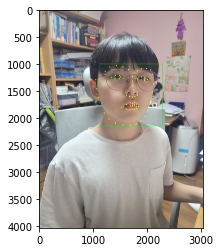

In [ ]:
# list_landmarksÏùò ÏõêÏÜåÍ∞Ä 1Í∞úÏù¥ÎØÄÎ°ú ÏïÑÎûò Î∞òÎ≥µÎ¨∏ÏùÄ ÌïúÎ≤àÎßå Ïã§ÌñâÎê®
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)
            # cv2.circle: OpenCVÏùò ÏõêÏùÑ Í∑∏Î¶¨Îäî Ìï®Ïàò
            # img_show Ïù¥ÎØ∏ÏßÄ ÏúÑ Í∞ÅÍ∞ÅÏùò pointÏóê
            # ÌÅ¨Í∏∞Í∞Ä 2Ïù¥Í≥† (0, 255, 255)ÏÉâÏúºÎ°ú ÎÇ¥Î∂ÄÍ∞Ä Ï±ÑÏõåÏßÑ(-1) ÏõêÏùÑ Í∑∏Î¶º
            # (ÎßàÏßÄÎßâ Ïù∏ÏàòÍ∞Ä ÏûêÏó∞ÏàòÎùºÎ©¥ Í∑∏ÎßåÌÅºÏùò ÎëêÍªòÏùò ÏÑ†ÏúºÎ°ú ÏõêÏù¥ Í∑∏Î†§Ïßê)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB Ïù¥ÎØ∏ÏßÄÎ°ú Ï†ÑÌôò
plt.imshow(img_show_rgb)
    # Ïù¥ÎØ∏ÏßÄÎ•º Ï§ÄÎπÑ
plt.show()
    # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•

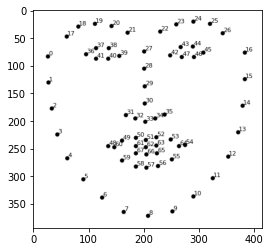

In [ ]:
landmark_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/E-8-8.png' # Î≥∏Ïù∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäî Í≤ΩÎ°úÎ•º Í∞ÄÏßÄÍ≥† Ïò®Îã§.
landmark = cv2.imread(landmark_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§

plt.imshow(landmark) # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ Ï∂úÎ†•Ìï† Ïù¥ÎØ∏ÏßÄÎ•º Ïò¨Î†§Ï§ÄÎã§. (Ïã§Ï†ú Ï∂úÎ†•ÏùÄ ÌïòÏßÄ ÏïäÏùå)
plt.show() # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•Ìï¥Ï§ÄÎã§. (Ïã§Ï†ú Ï∂úÎ†•)

In [ ]:
# zip() : Îëê Í∑∏Î£πÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏÑúÎ°ú ÏóÆÏñ¥Ï£ºÎäî ÌååÏù¥Ïç¨Ïùò ÎÇ¥Ïû• Ìï®Ïàò
# dlib_rectsÏôÄ list_landmarks Îç∞Ïù¥ÌÑ∞Î•º ÏóÆÏñ¥ Ï£ºÏóàÏùå
# dlib_rects : ÏñºÍµ¥ ÏòÅÏó≠ÏùÑ Ï†ÄÏû•ÌïòÍ≥† ÏûàÎäî Í∞í
# ÏΩî ÎÅùÏùÑ Ï§ëÏã¨ÏúºÎ°ú ÏàòÏóºÏùÑ Î∂ôÏó¨Ï£ºÎ†§ Ìï®.

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # ÏñºÍµ¥ ÏòÅÏó≠ÏùÑ Ï†ÄÏû•ÌïòÍ≥† ÏûàÎäî Í∞íÍ≥º 68Í∞úÏùò ÎûúÎìúÎßàÌÅ¨Î•º Ï†ÄÏû•ÌïòÍ≥† ÏûàÎäî Í∞íÏúºÎ°ú Î∞òÎ≥µÎ¨∏ Ïã§Ìñâ
    print (landmark[33]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[33][0] # Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏΩî Î∂ÄÏúÑÏùò xÍ∞í
    y = landmark[33][1] # Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏΩî Î∂ÄÏúÑÏùò yÍ∞í - ÏñºÍµ¥ ÏòÅÏó≠Ïùò ÏÑ∏Î°úÎ•º Ï∞®ÏßÄÌïòÎäî ÌîΩÏÖÄÏùò Ïàò//2 ‚Üí (437, 182-(186+1//2))
    w = h = dlib_rect.width() # ÏñºÍµ¥ ÏòÅÏó≠Ïùò Í∞ÄÎ°úÎ•º Ï∞®ÏßÄÌïòÎäî ÌîΩÏÖÄÏùò Ïàò (531-345+1) ‚Üí max(x) - min(x) +1(ÌîΩÏÖÄÏùò Ïàò Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê 1ÏùÑ ÎçîÌï¥Ï§å ‚Üí ÌîΩÏÖÄ ÏàòÎäî Ï†ê ÌïòÎÇòÎ°úÎèÑ 1Ïù¥ Îê®)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(1721, 1608)
(x,y) : (1721,1608)
(w,h) : (1151,1151)


(1151, 1151, 3)


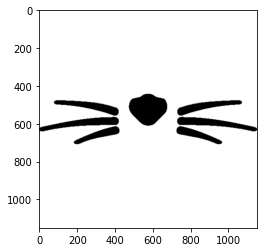

In [ ]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # ÏàòÏóº Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÎ°ú
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§ // cv2.imread(Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú) ‚Üí imageÍ∞ùÏ≤¥ ÌñâÎ†¨ÏùÑ Î∞òÌôò
img_sticker = cv2.resize(img_sticker, (w,h)) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Ï°∞Ï†ï ‚Üí w,hÎäî ÏñºÍµ¥ ÏòÅÏó≠Ïùò Í∞ÄÎ°úÎ•º Ï∞®ÏßÄÌïòÎäî ÌîΩÏÖÄÏùò Ïàò(187) // cv2.resize(imageÍ∞ùÏ≤¥ ÌñâÎ†¨, (Í∞ÄÎ°ú Í∏∏Ïù¥, ÏÑ∏Î°ú Í∏∏Ïù¥))
print (img_sticker.shape) # ÏÇ¨Ïù¥Ï¶àÎ•º Ï°∞Ï†ïÌïú Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÏùò Ï∞®Ïõê ÌôïÏù∏
plt.imshow(img_sticker)
# print(img_sticker)  # ÏàòÏóºÏùò Î∞∞Í≤ΩÏÉâÏù¥ 255Ïù∏ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå. 

In [ ]:
# Ïù¥ÎØ∏ÏßÄÏùò Í∏∞Ï§ÄÏ†êÏùÄ ÏôºÏ™Ω ÏúÑ Íº≠ÏßÄÏ†ê.
refined_x = x - w // 2 # ÏΩî Ï§ëÏã¨, xÏóêÏÑú Ïä§Ìã∞Ïª§ Í∞ÄÎ°ú Í∏∏Ïù¥ Î≥¥Ï†ï
refined_y = y - w // 2 # ÏΩî Ï§ëÏã¨, yÍ∞í Í∑∏ÎåÄÎ°ú...

# Ï¶â, refined_x, refined_yÍ∞íÏóêÏÑú Ïä§Ìã∞Ïª§Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏãúÏûëÎê®
print (f'(x,y) : ({refined_x},{refined_y})') 
# ÏàòÏóº Ïä§Ìã∞Ïª§Îäî ÏñºÍµ¥ Ï§ëÏïôÏóê ÎÜìÏùÑ Í±∞Ïó¨ÏÑú Ï¢åÌëúÍ∞Ä ÏùåÏàòÍ∞íÏù¥ ÎÇòÏò§ÏßÄ ÏïäÏïòÏßÄÎßå ÏïÑÎûò ÏΩîÎìúÎäî Ï∞∏Í≥†Î°ú..

(x,y) : (1146,1033)


In [ ]:
# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÍ∞Ä Ïù¥ÎØ∏ÏßÄ Î∞ñÏóêÏÑú ÏãúÏûëÌïòÏßÄ ÏïäÎèÑÎ°ù Ï°∞Ï†ïÏù¥ ÌïÑÏöîÌï®
# Ï¢åÌëú ÏàúÏÑúÍ∞Ä y,xÏûÑÏóê Ïú†ÏùòÌïúÎã§. (y,x,rgb channel)
# ÌòÑÏû¨ ÏÉÅÌô©ÏóêÏÑúÎäî -y ÌÅ¨Í∏∞ÎßåÌÅº Ïä§Ìã∞Ïª§Î•º crop ÌïòÍ≥†, top Ïùò xÏ¢åÌëúÏôÄ y Ï¢åÌëúÎ•º Í∞ÅÍ∞ÅÏùò Í≤ΩÏö∞Ïóê ÎßûÏ∂∞ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÍ≥Ñ Í∞íÏúºÎ°ú ÏàòÏ†ïÌïòÎ©¥ ÏïÑÎûòÏôÄ Í∞ôÏùÄ ÌòïÏãùÏúºÎ°ú ÎÇòÏòµÎãàÎã§.
# ÏùåÏàòÍ∞í ÎßåÌÅº ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄ(ÌòπÏùÄ Ï∂îÌõÑ Ï†ÅÏö©Ìï† Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ)Î•º ÏûêÎ•∏Îã§.

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

# ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÎ•º ÏîåÏö∞Í∏∞ ÏúÑÌï¥ ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏãúÏûëÌï† yÏ¢åÌëú Í∞í Ï°∞Ï†ï
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_yÍ∞Ä -98Ïù¥ÎØÄÎ°ú, img_sticker[98: , :]Í∞Ä ÎêúÎã§. (187, 187, 3)ÏóêÏÑú (89, 187, 3)Ïù¥ Îê® (187Í∞ú Ï§ëÏóêÏÑú 98Í∞úÍ∞Ä ÏûòÎ†§ÎÇòÍ∞ê)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (1146,1033)


In [ ]:
# sticker_areaÎäî ÏõêÎ≥∏Ïù¥ÎØ∏ÏßÄÏóêÏÑú Ïä§Ìã∞Ïª§Î•º Ï†ÅÏö©Ìï† ÏúÑÏπòÎ•º cropÌïú Ïù¥ÎØ∏ÏßÄ ÏûÖÎãàÎã§.

# Ï¢åÌëú ÏàúÏÑúÍ∞Ä y,xÏûÑÏóê Ïú†ÏùòÌïúÎã§. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏÇ¨Ïö©Ìï† Î∂ÄÎ∂ÑÏùÄ 0Ïù¥ ÏïÑÎãå ÏÉâÏù¥ ÏûàÎäî Î∂ÄÎ∂ÑÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
# png Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÏùò Î∞îÌÉïÏù¥ 0Ïù∏ Í≤ÉÍ≥º 255Ïù∏ Í≤ÉÏù¥ ÏûàÏñ¥ ÌôïÏù∏Ìï¥Ïïº Ìï®. 

# ÌòÑÏû¨ ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÏóêÏÑúÎäî ÏôïÍ¥ÄÍ≥º Î∞õÏπ®ÎåÄ Î∞ëÏùò ------ Î∂ÄÎ∂ÑÏù¥ Îê®
# Í∑∏Î†áÍ∏∞ ÎïåÎ¨∏Ïóê 0Ïù∏ Î∂ÄÎ∂Ñ(Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏóÜÎäî Î∂ÄÎ∂Ñ)ÏùÄ Ï†úÏô∏ÌïòÍ≥† Ï†ÅÏö©
# sticker_areaÎäî ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóêÏÑú Ïä§Ìã∞Ïª§Î•º Ï†ÅÏö©Ìï† ÏúÑÏπòÎ•º ÎØ∏Î¶¨ ÏûòÎùºÎÇ∏ Ïù¥ÎØ∏ÏßÄÏûÖÎãàÎã§.
# Ï¶â, ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏóÜÎäî Î∂ÄÎ∂Ñ(ÏôïÍ¥ÄÍ≥º Î∞õÏπ®ÎåÄ Î∞ëÏùò ------ Î∂ÄÎ∂Ñ)ÏùÄ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÎØ∏Î¶¨ ÏûòÎùºÎÜìÏùÄ sticker_area(Ïä§Ìã∞Ïª§ Ï†ÅÏö©Ìï† Î∂ÄÎ∂Ñ ÎßåÌÅº ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏûêÎ•∏ Ïù¥ÎØ∏ÏßÄ)Î•º Ï†ÅÏö©ÌïòÍ≥†,
# ÎÇòÎ®∏ÏßÄ Î∂ÄÎ∂ÑÏùÄ Ïä§Ìã∞Ïª§Î°ú Ï±ÑÏõåÏ£ºÎ©¥ Îê®

# np.whereÎäî Ï°∞Í±¥Ïóê Ìï¥ÎãπÌïòÎäî Ïù∏Îç±Ïä§Îßå Ï∞æÏïÑÏÑú Í∞íÏùÑ Ï†ÅÏö©ÌïòÎäî Î∞©Î≤ïÏù¥Îã§.
# ÏïÑÎûò ÏΩîÎìúÏóêÏÑúÎäî img_stickerÍ∞Ä 0 ÎòêÎäî 255Ïùº Í≤ΩÏö∞(ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏôïÍ¥Ä Î∂ÄÎ∂Ñ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïù¥ÎØ∏ÏßÄ)ÏóêÎäî sticker_area(ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóêÏÑú Ïä§Ìã∞Ïª§Î•º Ï†ÅÏö©Ìï† ÏúÑÏπòÎ•º ÎØ∏Î¶¨ ÏûòÎùºÎÇ∏ Ïù¥ÎØ∏ÏßÄ)Î•º Ï†ÅÏö©ÌïòÍ≥†,
# ÎÇòÎ®∏ÏßÄ Î∂ÄÎ∂ÑÏùÄ img_sticker(ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄ)Î•º Ï†ÅÏö©ÌïúÎã§.

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("Ïäù~")

Ïäù~


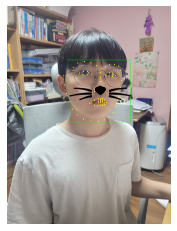

In [ ]:
# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Ï†ÅÏö©Ìïú Ïù¥ÎØ∏ÏßÄÎ•º Î≥¥Ïó¨Ï§ÄÎã§.
# bounding boxÏôÄ landmarkÎ•º ÎØ∏Î¶¨ Ï†ÅÏö©Ìï¥ÎÜìÏùÄ img_showÏóê ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÎ•º ÎçßÎ∂ôÏù∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÎÇòÏò§Í≤å ÎêúÎã§.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

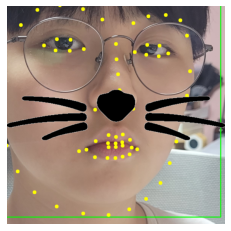

In [ ]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0],refined_x:refined_x+img_sticker.shape[1]]
plt.imshow(cv2.cvtColor(sticker_area, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

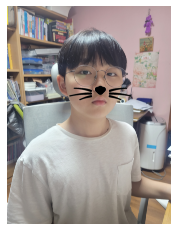

In [ ]:
# img_bgrÏùÄ 7-2ÏóêÏÑú rgbÎ°úÎßå Ï†ÅÏö©Ìï¥ÎÜìÏùÄ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏù¥Îã§. 
img_bgr_original = img_bgr.copy() # copy original image for transparent stiker

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgbÎßå Ï†ÅÏö©Ìï¥ÎÜìÏùÄ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÎ•º ÎçÆÏñ¥ ÏîåÏö¥ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÎÇòÏò§Í≤å ÎêúÎã§.
plt.axis('off')
plt.show()

# https://jimmy-ai.tistory.com/46
# https://numpy.org/doc/stable/reference/generated/numpy.where.html

## Control Transparency
- cv2.addWeightedÎ•º Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Ìï©ÏπòÎäî Îëê Ïù¥ÎØ∏ÏßÄÎì§Ïùò ÌÅ¨Í∏∞Í∞Ä Í∞ôÏïÑÏïº ÌïúÎã§Í≥†..
- Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∞∞Í≤ΩÎßå Ïñ¥ÎñªÍ≤å ÎäòÎ¶¨ÎÇò Í≥†ÎØºÌñàÏùå. Í∑∏Îü¨ÎÇò
- ÏàòÏóº Î∂ôÏù∏ ÏÇ¨ÏßÑÍ≥º ÏõêÎ≥∏ ÏÇ¨ÏßÑÏùÑ Ìï©ÏπòÍ∏∞Î°ú..

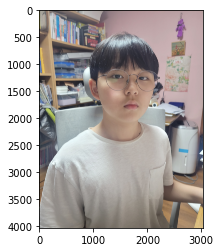

In [ ]:
plt.imshow(cv2.cvtColor(img_bgr_original, cv2.COLOR_BGR2RGB))

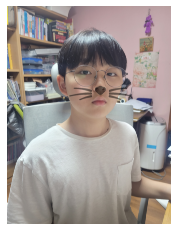

In [ ]:
img_combined = cv2.addWeighted(img_bgr,0.5,img_bgr_original, 0.5,0) # img_bgr, img_bgr_original
plt.imshow(cv2.cvtColor(img_combined, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# for Rotated Face

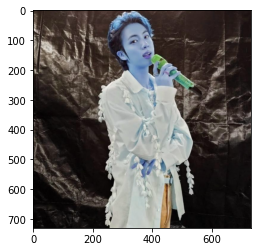

In [ ]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/ÏßÑ.jpg' # Î≥∏Ïù∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäî Í≤ΩÎ°úÎ•º Í∞ÄÏßÄÍ≥† Ïò®Îã§.
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show =      img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§|
plt.imshow(img_bgr) # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ Ï∂úÎ†•Ìï† Ïù¥ÎØ∏ÏßÄÎ•º Ïò¨Î†§Ï§ÄÎã§. (Ïã§Ï†ú Ï∂úÎ†•ÏùÄ ÌïòÏßÄ ÏïäÏùå)
plt.show() # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•Ìï¥Ï§ÄÎã§. (Ïã§Ï†ú Ï∂úÎ†•)

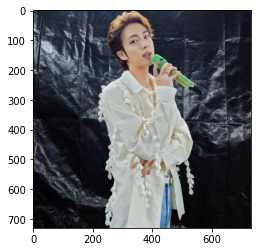

In [ ]:
# Ïù¥ÎØ∏ÏßÄ Ïã§Ï†ú Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ Ïù¥ÎØ∏ÏßÄÎ•º Ïò¨Î†§
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏùÑ ÏûäÏßÄÎßàÏÑ∏Ïöî. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # Ïù¥ÎØ∏ÏßÄ Ïã§Ï†ú Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ Ïù¥ÎØ∏ÏßÄÎ•º Ïò¨Î†§Ï§å (ÏõêÌïòÎäî ÏÇ¨Ïù¥Ï¶àÏùò ÌîΩÏÖÄÏùÑ ÏõêÌïòÎäî ÏÉâÏúºÎ°ú Ï±ÑÏõåÏÑú ÎßåÎì† Í∑∏Î¶ºÏù¥ÎùºÍ≥† Ìï©ÎãàÎã§.)
plt.show() # Ïù¥ÎØ∏ÏßÄ Ïã§Ï†ú Ï∂úÎ†•

In [ ]:
# detectorÎ•º ÏÑ†Ïñ∏Ìï©ÎãàÎã§
detector_hog = dlib.get_frontal_face_detector() # Í∏∞Î≥∏ ÏñºÍµ¥ Í∞êÏßÄÍ∏∞Î•º Î∞òÌôò
print("üå´üõ∏")

üå´üõ∏


In [ ]:
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("üå´üõ∏")

üå´üõ∏


rectangles[[(318, 68) (426, 175)]]


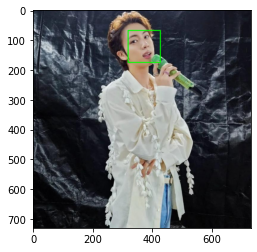

In [ ]:
# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ Î¶¨Ïä§Ìä∏
# Ïó¨Îü¨ ÏñºÍµ¥Ïù¥ ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§
print(dlib_rects)   

for dlib_rect in dlib_rects: # Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠Ïùò Ï¢åÌëú
    l = dlib_rect.left() # ÏôºÏ™Ω
    t = dlib_rect.top() # ÏúÑÏ™Ω
    r = dlib_rect.right() # Ïò§Î•∏Ï™Ω
    b = dlib_rect.bottom() # ÏïÑÎûòÏ™Ω
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # ÏãúÏûëÏ†êÏùò Ï¢åÌëúÏôÄ Ï¢ÖÎ£åÏ†ê Ï¢åÌëúÎ°ú ÏßÅÍ∞Å ÏÇ¨Í∞ÅÌòïÏùÑ Í∑∏Î¶º
    
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # Ï†ÄÏû•Ìïú landmark Î™®Îç∏Ïùò Ï£ºÏÜåÎ•º model_path Î≥ÄÏàòÏóê Ï†ÄÏû•
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò shape_predictor Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò¥
    # landmark_predictorÎäî RGBÏù¥ÎØ∏ÏßÄÏôÄ dlib.rectangleÎ•º ÏûÖÎ†• Î∞õÍ≥† dlib.full_object_detectionÎ•º Î∞òÌôò
    # dlib.rectangle: ÎÇ¥Î∂ÄÎ•º ÏòàÏ∏°ÌïòÎäî Î∞ïÏä§
    # dlib.full_object_detection: Í∞Å Íµ¨ÏÑ± ÏöîÏÜåÏùò ÏúÑÏπòÏôÄ, Ïù¥ÎØ∏ÏßÄ ÏÉÅÏùò Í∞ùÏ≤¥Ïùò ÏúÑÏπòÎ•º ÎÇòÌÉÄÎÉÑ
print("üå´üõ∏")



üå´üõ∏


In [ ]:
list_landmarks = []
    # ÎûúÎìúÎßàÌÅ¨Ïùò ÏúÑÏπòÎ•º Ï†ÄÏû•Ìï† list ÏÉùÏÑ±   

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
# face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # Î™®Îì† landmarkÏùò ÏúÑÏπòÏ†ïÎ≥¥Î•º points Î≥ÄÏàòÏóê Ï†ÄÏû•
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # Í∞ÅÍ∞ÅÏùò landmark ÏúÑÏπòÏ†ïÎ≥¥Î•º (x,y) ÌòïÌÉúÎ°ú Î≥ÄÌôòÌïòÏó¨ list_points Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•
    list_landmarks.append(list_points)
        # list_landmarksÏóê ÎûúÎìúÎßàÌÅ¨ Î¶¨Ïä§Ìä∏Î•º Ï†ÄÏû•

print(len(list_landmarks[0]))
    # ÏñºÍµ¥Ïù¥ nÍ∞úÏù∏ Í≤ΩÏö∞ list_landmarksÎäî nÍ∞úÏùò ÏõêÏÜåÎ•º Í∞ñÍ≥†
    # Í∞Å ÏõêÏÜåÎäî 68Í∞úÏùò ÎûúÎìúÎßàÌÅ¨ ÏúÑÏπòÍ∞Ä ÎÇòÏó¥Îêú list 
    # list_landmarksÏùò ÏõêÏÜåÍ∞Ä 1Í∞úÏù¥ÎØÄÎ°ú list_landmarks[1]ÏùÑ Ìò∏Ï∂úÌïòÎ©¥ IndexErrorÍ∞Ä Î∞úÏÉù

68


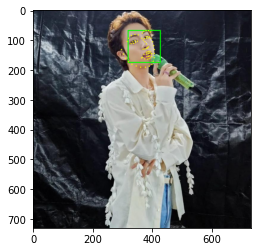

In [ ]:
# list_landmarksÏùò ÏõêÏÜåÍ∞Ä 1Í∞úÏù¥ÎØÄÎ°ú ÏïÑÎûò Î∞òÎ≥µÎ¨∏ÏùÄ ÌïúÎ≤àÎßå Ïã§ÌñâÎê®
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCVÏùò ÏõêÏùÑ Í∑∏Î¶¨Îäî Ìï®Ïàò
            # img_show Ïù¥ÎØ∏ÏßÄ ÏúÑ Í∞ÅÍ∞ÅÏùò pointÏóê
            # ÌÅ¨Í∏∞Í∞Ä 2Ïù¥Í≥† (0, 255, 255)ÏÉâÏúºÎ°ú ÎÇ¥Î∂ÄÍ∞Ä Ï±ÑÏõåÏßÑ(-1) ÏõêÏùÑ Í∑∏Î¶º
            # (ÎßàÏßÄÎßâ Ïù∏ÏàòÍ∞Ä ÏûêÏó∞ÏàòÎùºÎ©¥ Í∑∏ÎßåÌÅºÏùò ÎëêÍªòÏùò ÏÑ†ÏúºÎ°ú ÏõêÏù¥ Í∑∏Î†§Ïßê)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB Ïù¥ÎØ∏ÏßÄÎ°ú Ï†ÑÌôò
plt.imshow(img_show_rgb)
    # Ïù¥ÎØ∏ÏßÄÎ•º Ï§ÄÎπÑ
plt.show()
    # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•

## Measure Angle of Roatated face
- ÏñºÍµ¥ Ï§ëÏïôÏùò ÏßÅÏÑ†Ïù∏ ÏΩî ÏúÑÏùò Ï†ê 27~30 ÏÑ†Ïù¥ ÏñºÎßàÎÇò ÌöåÏ†Ñ ÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏

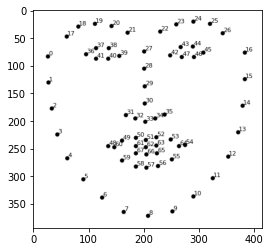

In [ ]:
landmark_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/E-8-8.png' # Î≥∏Ïù∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäî Í≤ΩÎ°úÎ•º Í∞ÄÏßÄÍ≥† Ïò®Îã§.
landmark = cv2.imread(landmark_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
plt.imshow(landmark) # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ Ï∂úÎ†•Ìï† Ïù¥ÎØ∏ÏßÄÎ•º Ïò¨Î†§Ï§ÄÎã§. (Ïã§Ï†ú Ï∂úÎ†•ÏùÄ ÌïòÏßÄ ÏïäÏùå)
plt.show() # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•Ìï¥Ï§ÄÎã§. (Ïã§Ï†ú Ï∂úÎ†•)

In [ ]:
# get a angle of face
import math

def coordinate(no):
    for landmark in list_landmarks: # ÏñºÍµ¥ ÏòÅÏó≠ÏùÑ Ï†ÄÏû•ÌïòÍ≥† ÏûàÎäî Í∞íÍ≥º 68Í∞úÏùò ÎûúÎìúÎßàÌÅ¨Î•º Ï†ÄÏû•ÌïòÍ≥† ÏûàÎäî Í∞íÏúºÎ°ú Î∞òÎ≥µÎ¨∏ Ïã§Ìñâ
#         print (landmark[no]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
        x1 = landmark[no][0] # Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏΩî Î∂ÄÏúÑÏùò xÍ∞í
        y1 = landmark[no][1] 
        print(x1, y1)
    return x1, y1

def angle(x1, y1, x2, y2):
    radian = math.atan((x1-x2)/(y1-y2))
    degree = math.degrees(radian)
    print(degree)
    return degree

# https://ko.from-locals.com/python-math-sin-cos-tan/
# https://docs.python.org/3/library/math.html#trigonometric-functions

In [ ]:
x1, y1 = coordinate(30)
x2, y2 = coordinate(27)

degree = angle(x1, y1, x2, y2)

# ÌöåÏ†Ñ Í∞ÅÎèÑ ÏñªÏùå

379 113
364 94
38.29016319224307


## Rotate Sticker

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # ÏñºÍµ¥ ÏòÅÏó≠ÏùÑ Ï†ÄÏû•ÌïòÍ≥† ÏûàÎäî Í∞íÍ≥º 68Í∞úÏùò ÎûúÎìúÎßàÌÅ¨Î•º Ï†ÄÏû•ÌïòÍ≥† ÏûàÎäî Í∞íÏúºÎ°ú Î∞òÎ≥µÎ¨∏ Ïã§Ìñâ
    w = h = dlib_rect.width() # ÏñºÍµ¥ ÏòÅÏó≠Ïùò Í∞ÄÎ°úÎ•º Ï∞®ÏßÄÌïòÎäî ÌîΩÏÖÄÏùò Ïàò (531-345+1) ‚Üí max(x) - min(x) +1(ÌîΩÏÖÄÏùò Ïàò Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê 1ÏùÑ ÎçîÌï¥Ï§å ‚Üí ÌîΩÏÖÄ ÏàòÎäî Ï†ê ÌïòÎÇòÎ°úÎèÑ 1Ïù¥ Îê®)
    print (f'(w,h) : ({w},{h})')

(w,h) : (109,109)


(109, 109, 3)


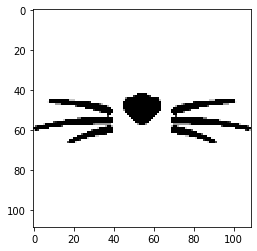

In [ ]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÎ°ú
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§ // cv2.imread(Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú) ‚Üí imageÍ∞ùÏ≤¥ ÌñâÎ†¨ÏùÑ Î∞òÌôò
img_sticker = cv2.resize(img_sticker, (w,h)) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Ï°∞Ï†ï ‚Üí w,hÎäî ÏñºÍµ¥ ÏòÅÏó≠Ïùò Í∞ÄÎ°úÎ•º Ï∞®ÏßÄÌïòÎäî ÌîΩÏÖÄÏùò Ïàò(187) // cv2.resize(imageÍ∞ùÏ≤¥ ÌñâÎ†¨, (Í∞ÄÎ°ú Í∏∏Ïù¥, ÏÑ∏Î°ú Í∏∏Ïù¥))
print (img_sticker.shape) # ÏÇ¨Ïù¥Ï¶àÎ•º Ï°∞Ï†ïÌïú ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÏùò Ï∞®Ïõê ÌôïÏù∏
plt.imshow(img_sticker)
# print(img_sticker)

In [ ]:
def im_rotate(img, degree):
    h, w = img.shape[:-1] # Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞
#     crossLine = int(((w * h + h * w) ** 0.5)) # Ïñ¥ÎîîÏóê ÏÇ¨Ïö©?
    centerRotatePT = int(w / 2), int(h / 2) 
    new_h, new_w = h, w  #Î≥ÄÌôòÌïòÎäî Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞ ÏÑ§Ï†ïÌïòÎ†§Í≥†
    rotatefigure = cv2.getRotationMatrix2D(centerRotatePT, degree, 1)
    result = cv2.warpAffine(img, rotatefigure, (new_w, new_h), borderValue=(255,255,255))
    return result

# https://deep-learning-study.tistory.com/175
# https://deep-learning-study.tistory.com/199

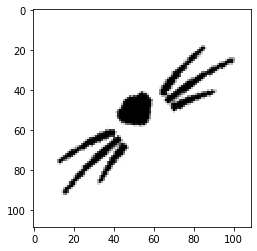

In [ ]:
img_sticker = im_rotate(img_sticker,degree)
plt.imshow(img_sticker)

In [ ]:
# Ïä§Ìã∞Ïª§ Î∂ôÏùº Í≥≥ Ï†ïÌïòÍ∏∞
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # ÏñºÍµ¥ ÏòÅÏó≠ÏùÑ Ï†ÄÏû•ÌïòÍ≥† ÏûàÎäî Í∞íÍ≥º 68Í∞úÏùò ÎûúÎìúÎßàÌÅ¨Î•º Ï†ÄÏû•ÌïòÍ≥† ÏûàÎäî Í∞íÏúºÎ°ú Î∞òÎ≥µÎ¨∏ Ïã§Ìñâ
    print (landmark[33]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[33][0] # Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏΩî Î∂ÄÏúÑÏùò xÍ∞í
    y = landmark[33][1] # Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏΩî Î∂ÄÏúÑÏùò yÍ∞í - ÏñºÍµ¥ ÏòÅÏó≠Ïùò ÏÑ∏Î°úÎ•º Ï∞®ÏßÄÌïòÎäî ÌîΩÏÖÄÏùò Ïàò//2 ‚Üí (437, 182-(186+1//2))
    w, h = img_sticker.shape[:-1] # ÏñºÍµ¥ ÏòÅÏó≠Ïùò Í∞ÄÎ°úÎ•º Ï∞®ÏßÄÌïòÎäî ÌîΩÏÖÄÏùò Ïàò (531-345+1) ‚Üí max(x) - min(x) +1(ÌîΩÏÖÄÏùò Ïàò Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê 1ÏùÑ ÎçîÌï¥Ï§å ‚Üí ÌîΩÏÖÄ ÏàòÎäî Ï†ê ÌïòÎÇòÎ°úÎèÑ 1Ïù¥ Îê®)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(380, 128)
(x,y) : (380,128)
(w,h) : (109,109)


In [ ]:
# Ïù¥ÎØ∏ÏßÄÏùò Í∏∞Ï§ÄÏ†êÏùÄ ÏôºÏ™Ω ÏúÑ Íº≠ÏßÄÏ†ê.
refined_x = x - w // 2 # ÏΩî Ï§ëÏã¨, xÏóêÏÑú Ïä§Ìã∞Ïª§ Í∞ÄÎ°ú Í∏∏Ïù¥ Î≥¥Ï†ï
refined_y = y - w // 2  # ÏΩî Ï§ëÏã¨, yÍ∞í Í∑∏ÎåÄÎ°ú...

# Ï¶â, refined_x, refined_yÍ∞íÏóêÏÑú Ïä§Ìã∞Ïª§Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏãúÏûëÎê®
print (f'(x,y) : ({refined_x},{refined_y})') 
# ÏàòÏóº Ïä§Ìã∞Ïª§Îäî ÏñºÍµ¥ Ï§ëÏïôÏóê ÎÜìÏùÑ Í±∞Ïó¨ÏÑú Ï¢åÌëúÍ∞Ä ÏùåÏàòÍ∞íÏù¥ ÎÇòÏò§ÏßÄ ÏïäÏïòÏßÄÎßå ÏïÑÎûò ÏΩîÎìúÎäî Ï∞∏Í≥†Î°ú..

(x,y) : (326,74)


In [ ]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_yÍ∞Ä -98Ïù¥ÎØÄÎ°ú, img_sticker[98: , :]Í∞Ä ÎêúÎã§. (187, 187, 3)ÏóêÏÑú (89, 187, 3)Ïù¥ Îê® (187Í∞ú Ï§ëÏóêÏÑú 98Í∞úÍ∞Ä ÏûòÎ†§ÎÇòÍ∞ê)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (326,74)


In [ ]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("Ïäù~")

Ïäù~


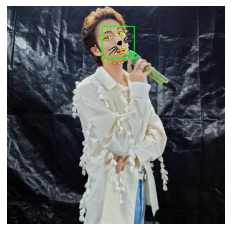

In [ ]:
# ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÎ•º Ï†ÅÏö©Ìïú Ïù¥ÎØ∏ÏßÄÎ•º Î≥¥Ïó¨Ï§ÄÎã§.
# ÏñºÍµ¥ ÏòÅÏó≠(7-3)Í≥º ÎûúÎìúÎßàÌÅ¨(7-4)Î•º ÎØ∏Î¶¨ Ï†ÅÏö©Ìï¥ÎÜìÏùÄ img_showÏóê ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÎ•º ÎçßÎ∂ôÏù∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÎÇòÏò§Í≤å ÎêúÎã§.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


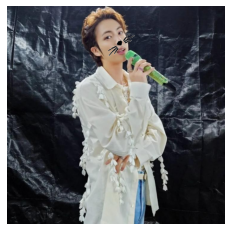

In [ ]:
# img_bgrÏùÄ rgbÎ°úÎßå Ï†ÅÏö©Ìï¥ÎÜìÏùÄ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏù¥Îã§. 
img_bgr_original = img_bgr.copy() # copy original image for transparent stiker

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgbÎßå Ï†ÅÏö©Ìï¥ÎÜìÏùÄ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÎ•º ÎçÆÏñ¥ ÏîåÏö¥ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÎÇòÏò§Í≤å ÎêúÎã§.
plt.axis('off')
plt.show()



# for Rotated Face & Side Camera Angle

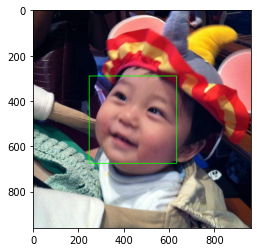

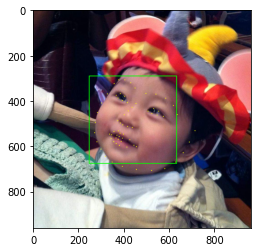

In [ ]:
# detectorÎ•º ÏÑ†Ïñ∏Ìï©ÎãàÎã§
detector_hog = dlib.get_frontal_face_detector() # Í∏∞Î≥∏ ÏñºÍµ¥ Í∞êÏßÄÍ∏∞Î•º Î∞òÌôò

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/17.jpg' # Î≥∏Ïù∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäî Í≤ΩÎ°úÎ•º Í∞ÄÏßÄÍ≥† Ïò®Îã§.
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§|
# Ïù¥ÎØ∏ÏßÄ Ïã§Ï†ú Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ Ïù¥ÎØ∏ÏßÄÎ•º Ïò¨Î†§
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏùÑ ÏûäÏßÄÎßàÏÑ∏Ïöî. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

for dlib_rect in dlib_rects: # Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠Ïùò Ï¢åÌëú
    l = dlib_rect.left() # ÏôºÏ™Ω
    t = dlib_rect.top() # ÏúÑÏ™Ω
    r = dlib_rect.right() # Ïò§Î•∏Ï™Ω
    b = dlib_rect.bottom() # ÏïÑÎûòÏ™Ω
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # ÏãúÏûëÏ†êÏùò Ï¢åÌëúÏôÄ Ï¢ÖÎ£åÏ†ê Ï¢åÌëúÎ°ú ÏßÅÍ∞Å ÏÇ¨Í∞ÅÌòïÏùÑ Í∑∏Î¶º
    
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# Ï†ÄÏû•Ìïú landmark Î™®Îç∏Ïùò Ï£ºÏÜåÎ•º model_path Î≥ÄÏàòÏóê Ï†ÄÏû•
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
    # ÎûúÎìúÎßàÌÅ¨Ïùò ÏúÑÏπòÎ•º Ï†ÄÏû•Ìï† list ÏÉùÏÑ±   

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
# face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # Î™®Îì† landmarkÏùò ÏúÑÏπòÏ†ïÎ≥¥Î•º points Î≥ÄÏàòÏóê Ï†ÄÏû•
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # Í∞ÅÍ∞ÅÏùò landmark ÏúÑÏπòÏ†ïÎ≥¥Î•º (x,y) ÌòïÌÉúÎ°ú Î≥ÄÌôòÌïòÏó¨ list_points Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•
    list_landmarks.append(list_points)
        # list_landmarksÏóê ÎûúÎìúÎßàÌÅ¨ Î¶¨Ïä§Ìä∏Î•º Ï†ÄÏû•

# list_landmarksÏùò ÏõêÏÜåÍ∞Ä 1Í∞úÏù¥ÎØÄÎ°ú ÏïÑÎûò Î∞òÎ≥µÎ¨∏ÏùÄ ÌïúÎ≤àÎßå Ïã§ÌñâÎê®
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCVÏùò ÏõêÏùÑ Í∑∏Î¶¨Îäî Ìï®Ïàò
            # img_show Ïù¥ÎØ∏ÏßÄ ÏúÑ Í∞ÅÍ∞ÅÏùò pointÏóê
            # ÌÅ¨Í∏∞Í∞Ä 2Ïù¥Í≥† (0, 255, 255)ÏÉâÏúºÎ°ú ÎÇ¥Î∂ÄÍ∞Ä Ï±ÑÏõåÏßÑ(-1) ÏõêÏùÑ Í∑∏Î¶º
            # (ÎßàÏßÄÎßâ Ïù∏ÏàòÍ∞Ä ÏûêÏó∞ÏàòÎùºÎ©¥ Í∑∏ÎßåÌÅºÏùò ÎëêÍªòÏùò ÏÑ†ÏúºÎ°ú ÏõêÏù¥ Í∑∏Î†§Ïßê)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB Ïù¥ÎØ∏ÏßÄÎ°ú Ï†ÑÌôò
plt.imshow(img_show_rgb)
    # Ïù¥ÎØ∏ÏßÄÎ•º Ï§ÄÎπÑ
plt.show()
    # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•

## Measure Angle of Roatated face
- ÏñºÍµ¥ Ï§ëÏïôÏùò ÏßÅÏÑ†Ïù∏ ÏΩî ÏúÑÏùò Ï†ê 27~30 ÏÑ†Ïù¥ ÏñºÎßàÎÇò ÌöåÏ†Ñ ÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏

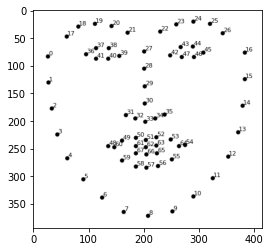

In [ ]:
landmark_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/E-8-8.png' # Î≥∏Ïù∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäî Í≤ΩÎ°úÎ•º Í∞ÄÏßÄÍ≥† Ïò®Îã§.
landmark = cv2.imread(landmark_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
plt.imshow(landmark) # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ Ï∂úÎ†•Ìï† Ïù¥ÎØ∏ÏßÄÎ•º Ïò¨Î†§Ï§ÄÎã§. (Ïã§Ï†ú Ï∂úÎ†•ÏùÄ ÌïòÏßÄ ÏïäÏùå)
plt.show() # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•Ìï¥Ï§ÄÎã§. (Ïã§Ï†ú Ï∂úÎ†•)

In [ ]:
# get a angle of face
import math

def coordinate(no):
    for landmark in list_landmarks: # ÏñºÍµ¥ ÏòÅÏó≠ÏùÑ Ï†ÄÏû•ÌïòÍ≥† ÏûàÎäî Í∞íÍ≥º 68Í∞úÏùò ÎûúÎìúÎßàÌÅ¨Î•º Ï†ÄÏû•ÌïòÍ≥† ÏûàÎäî Í∞íÏúºÎ°ú Î∞òÎ≥µÎ¨∏ Ïã§Ìñâ
#         print (landmark[no]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
        x1 = landmark[no][0] # Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏΩî Î∂ÄÏúÑÏùò xÍ∞í
        y1 = landmark[no][1] 
        print(x1, y1)
    return x1, y1

def angle(x1, y1, x2, y2):
    radian = math.atan((x1-x2)/(y1-y2))
    degree = math.degrees(radian)
    print(degree)
    return degree

# https://ko.from-locals.com/python-math-sin-cos-tan/
# https://docs.python.org/3/library/math.html#trigonometric-functions

x1, y1 = coordinate(30)
x2, y2 = coordinate(27)

degree = angle(x1, y1, x2, y2)

# ÌöåÏ†Ñ Í∞ÅÎèÑ ÏñªÏùå

401 461
453 411
-46.12330271407543


## Rotate Sticker

In [ ]:
# Ïä§Ìã∞Ïª§ Î∂ôÏùº Í≥≥ Ï†ïÌïòÍ∏∞
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # ÏñºÍµ¥ ÏòÅÏó≠ÏùÑ Ï†ÄÏû•ÌïòÍ≥† ÏûàÎäî Í∞íÍ≥º 68Í∞úÏùò ÎûúÎìúÎßàÌÅ¨Î•º Ï†ÄÏû•ÌïòÍ≥† ÏûàÎäî Í∞íÏúºÎ°ú Î∞òÎ≥µÎ¨∏ Ïã§Ìñâ
    print (landmark[33]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[33][0] # Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏΩî Î∂ÄÏúÑÏùò xÍ∞í
    y = landmark[33][1] # Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏΩî Î∂ÄÏúÑÏùò yÍ∞í - ÏñºÍµ¥ ÏòÅÏó≠Ïùò ÏÑ∏Î°úÎ•º Ï∞®ÏßÄÌïòÎäî ÌîΩÏÖÄÏùò Ïàò//2 ‚Üí (437, 182-(186+1//2))
    w = h = dlib_rect.width() # ÏñºÍµ¥ ÏòÅÏó≠Ïùò Í∞ÄÎ°úÎ•º Ï∞®ÏßÄÌïòÎäî ÌîΩÏÖÄÏùò Ïàò (531-345+1) ‚Üí max(x) - min(x) +1(ÌîΩÏÖÄÏùò Ïàò Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê 1ÏùÑ ÎçîÌï¥Ï§å ‚Üí ÌîΩÏÖÄ ÏàòÎäî Ï†ê ÌïòÎÇòÎ°úÎèÑ 1Ïù¥ Îê®)
    print (f'(w,h) : ({w},{h})')
    print (f'(x,y) : ({x},{y})')


(395, 505)
(w,h) : (386,386)
(x,y) : (395,505)


(386, 386, 3)


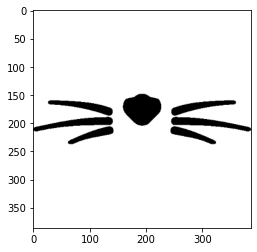

In [ ]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÎ°ú
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§ // cv2.imread(Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú) ‚Üí imageÍ∞ùÏ≤¥ ÌñâÎ†¨ÏùÑ Î∞òÌôò
img_sticker = cv2.resize(img_sticker, (w,h)) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Ï°∞Ï†ï ‚Üí w,hÎäî ÏñºÍµ¥ ÏòÅÏó≠Ïùò Í∞ÄÎ°úÎ•º Ï∞®ÏßÄÌïòÎäî ÌîΩÏÖÄÏùò Ïàò(187) // cv2.resize(imageÍ∞ùÏ≤¥ ÌñâÎ†¨, (Í∞ÄÎ°ú Í∏∏Ïù¥, ÏÑ∏Î°ú Í∏∏Ïù¥))
print (img_sticker.shape) # ÏÇ¨Ïù¥Ï¶àÎ•º Ï°∞Ï†ïÌïú ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÏùò Ï∞®Ïõê ÌôïÏù∏
plt.imshow(img_sticker)
# print(img_sticker)

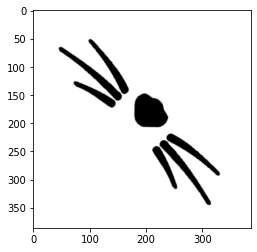

In [ ]:
def im_rotate(img, degree):
    h, w = img.shape[:-1] # Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞
#     crossLine = int(((w * h + h * w) ** 0.5)) # Ïñ¥ÎîîÏóê ÏÇ¨Ïö©?
    centerRotatePT = int(w / 2), int(h / 2) 
    new_h, new_w = h, w  #Î≥ÄÌôòÌïòÎäî Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞ ÏÑ§Ï†ïÌïòÎ†§Í≥†
    rotatefigure = cv2.getRotationMatrix2D(centerRotatePT, degree, 1)
    result = cv2.warpAffine(img, rotatefigure, (new_w, new_h), borderValue=(255,255,255))
    return result

# https://deep-learning-study.tistory.com/175
# https://deep-learning-study.tistory.com/199

img_sticker = im_rotate(img_sticker,degree)
plt.imshow(img_sticker)

In [ ]:
# Ïù¥ÎØ∏ÏßÄÏùò Í∏∞Ï§ÄÏ†êÏùÄ ÏôºÏ™Ω ÏúÑ Íº≠ÏßÄÏ†ê.
refined_x = x - w // 2 # ÏΩî Ï§ëÏã¨, xÏóêÏÑú Ïä§Ìã∞Ïª§ Í∞ÄÎ°ú Í∏∏Ïù¥ Î≥¥Ï†ï
refined_y = y - w // 2  # ÏΩî Ï§ëÏã¨, yÍ∞í Í∑∏ÎåÄÎ°ú...

# Ï¶â, refined_x, refined_yÍ∞íÏóêÏÑú Ïä§Ìã∞Ïª§Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏãúÏûëÎê®
print (f'(x,y) : ({refined_x},{refined_y})') 
# ÏàòÏóº Ïä§Ìã∞Ïª§Îäî ÏñºÍµ¥ Ï§ëÏïôÏóê ÎÜìÏùÑ Í±∞Ïó¨ÏÑú Ï¢åÌëúÍ∞Ä ÏùåÏàòÍ∞íÏù¥ ÎÇòÏò§ÏßÄ ÏïäÏïòÏßÄÎßå ÏïÑÎûò ÏΩîÎìúÎäî Ï∞∏Í≥†Î°ú..

(x,y) : (202,312)


In [ ]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_yÍ∞Ä -98Ïù¥ÎØÄÎ°ú, img_sticker[98: , :]Í∞Ä ÎêúÎã§. (187, 187, 3)ÏóêÏÑú (89, 187, 3)Ïù¥ Îê® (187Í∞ú Ï§ëÏóêÏÑú 98Í∞úÍ∞Ä ÏûòÎ†§ÎÇòÍ∞ê)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (202,312)


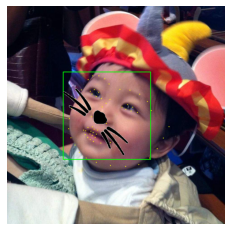

In [ ]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÎ•º Ï†ÅÏö©Ìïú Ïù¥ÎØ∏ÏßÄÎ•º Î≥¥Ïó¨Ï§ÄÎã§.
# ÏñºÍµ¥ ÏòÅÏó≠(7-3)Í≥º ÎûúÎìúÎßàÌÅ¨(7-4)Î•º ÎØ∏Î¶¨ Ï†ÅÏö©Ìï¥ÎÜìÏùÄ img_showÏóê ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÎ•º ÎçßÎ∂ôÏù∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÎÇòÏò§Í≤å ÎêúÎã§.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


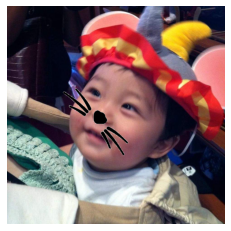

In [ ]:
# img_bgrÏùÄ rgbÎ°úÎßå Ï†ÅÏö©Ìï¥ÎÜìÏùÄ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏù¥Îã§. 
img_bgr_original = img_bgr.copy() # copy original image for transparent stiker

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgbÎßå Ï†ÅÏö©Ìï¥ÎÜìÏùÄ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÎ•º ÎçÆÏñ¥ ÏîåÏö¥ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÎÇòÏò§Í≤å ÎêúÎã§.
plt.axis('off')
plt.show()

# Ïπ¥Î©îÎùº ÏïµÍ∏ÄÏù¥ Ï∏°Î©¥ÏùÑ Ï∞çÎäî ÏÇ¨ÏßÑÏù¥Ïñ¥ÏÑú ÏñºÍµ¥Ïùò Ï§ëÏã¨Ïùò ÏΩîÏóê ÏôúÍ≥°Ïù¥ ÏûàÏóàÏùå.

# Lying position

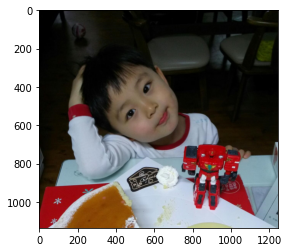

In [ ]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/14.jpg' # Î≥∏Ïù∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäî Í≤ΩÎ°úÎ•º Í∞ÄÏßÄÍ≥† Ïò®Îã§.
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show =      img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§|

# Ïù¥ÎØ∏ÏßÄ Ïã§Ï†ú Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ Ïù¥ÎØ∏ÏßÄÎ•º Ïò¨Î†§
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏùÑ ÏûäÏßÄÎßàÏÑ∏Ïöî. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# detectorÎ•º ÏÑ†Ïñ∏Ìï©ÎãàÎã§
detector_hog = dlib.get_frontal_face_detector() # Í∏∞Î≥∏ ÏñºÍµ¥ Í∞êÏßÄÍ∏∞Î•º Î∞òÌôò

dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

for dlib_rect in dlib_rects: # Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠Ïùò Ï¢åÌëú
    l = dlib_rect.left() # ÏôºÏ™Ω
    t = dlib_rect.top() # ÏúÑÏ™Ω
    r = dlib_rect.right() # Ïò§Î•∏Ï™Ω
    b = dlib_rect.bottom() # ÏïÑÎûòÏ™Ω
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 120, lineType=cv2.LINE_AA) # ÏãúÏûëÏ†êÏùò Ï¢åÌëúÏôÄ Ï¢ÖÎ£åÏ†ê Ï¢åÌëúÎ°ú ÏßÅÍ∞Å ÏÇ¨Í∞ÅÌòïÏùÑ Í∑∏Î¶º
    
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# ÎàÑÏö¥ ÏûêÏÑ∏Îäî face detectionÏù¥ ÏïàÎê®

# Covered face

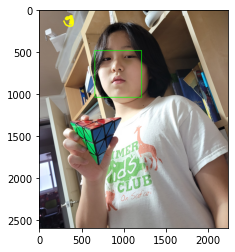

In [ ]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/15.jpg' # Î≥∏Ïù∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäî Í≤ΩÎ°úÎ•º Í∞ÄÏßÄÍ≥† Ïò®Îã§.
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show =      img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§|

# Ïù¥ÎØ∏ÏßÄ Ïã§Ï†ú Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ Ïù¥ÎØ∏ÏßÄÎ•º Ïò¨Î†§
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏùÑ ÏûäÏßÄÎßàÏÑ∏Ïöî. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# detectorÎ•º ÏÑ†Ïñ∏Ìï©ÎãàÎã§
detector_hog = dlib.get_frontal_face_detector() # Í∏∞Î≥∏ ÏñºÍµ¥ Í∞êÏßÄÍ∏∞Î•º Î∞òÌôò

dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

for dlib_rect in dlib_rects: # Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠Ïùò Ï¢åÌëú
    l = dlib_rect.left() # ÏôºÏ™Ω
    t = dlib_rect.top() # ÏúÑÏ™Ω
    r = dlib_rect.right() # Ïò§Î•∏Ï™Ω
    b = dlib_rect.bottom() # ÏïÑÎûòÏ™Ω
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 5, lineType=cv2.LINE_AA) # ÏãúÏûëÏ†êÏùò Ï¢åÌëúÏôÄ Ï¢ÖÎ£åÏ†ê Ï¢åÌëúÎ°ú ÏßÅÍ∞Å ÏÇ¨Í∞ÅÌòïÏùÑ Í∑∏Î¶º
    
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# list_landmarksÏùò ÏõêÏÜåÍ∞Ä 1Í∞úÏù¥ÎØÄÎ°ú ÏïÑÎûò Î∞òÎ≥µÎ¨∏ÏùÄ ÌïúÎ≤àÎßå Ïã§ÌñâÎê®
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)
            # cv2.circle: OpenCVÏùò ÏõêÏùÑ Í∑∏Î¶¨Îäî Ìï®Ïàò
            # img_show Ïù¥ÎØ∏ÏßÄ ÏúÑ Í∞ÅÍ∞ÅÏùò pointÏóê
            # ÌÅ¨Í∏∞Í∞Ä 2Ïù¥Í≥† (0, 255, 255)ÏÉâÏúºÎ°ú ÎÇ¥Î∂ÄÍ∞Ä Ï±ÑÏõåÏßÑ(-1) ÏõêÏùÑ Í∑∏Î¶º
            # (ÎßàÏßÄÎßâ Ïù∏ÏàòÍ∞Ä ÏûêÏó∞ÏàòÎùºÎ©¥ Í∑∏ÎßåÌÅºÏùò ÎëêÍªòÏùò ÏÑ†ÏúºÎ°ú ÏõêÏù¥ Í∑∏Î†§Ïßê)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB Ïù¥ÎØ∏ÏßÄÎ°ú Ï†ÑÌôò
plt.imshow(img_show_rgb)
    # Ïù¥ÎØ∏ÏßÄÎ•º Ï§ÄÎπÑ
plt.show()
    # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•

# Î®∏Î¶¨Ïπ¥ÎùΩÏúºÎ°ú Í∞ÄÎ†§ÏßÑ ÏñºÍµ¥ÏùÄ face detectionÏùÄ ÎêòÏßÄÎßå facelandmatkÎäî ÎêòÏßÄ ÏïäÏùå.
# Ïπ¥Î©îÎùº ÏïµÍ∏ÄÏù¥ ÏôúÍ≥°ÎêòÏñ¥ÎèÑ face detectionÏù¥ ÎêòÎäî Í±∏ Î≥¥Î©¥ Í∞ÄÎ†§ÏßÄÏßÄÎßå ÏïäÏïòÎã§Î©¥ landmarkÎèÑ Ïûò ÏàòÌñâÌñàÏùÑ Í±∞Îùº ÏòàÏÉÅ

# a Long distance

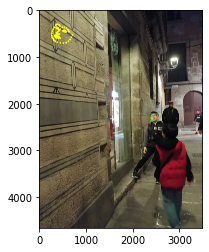

In [ ]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/16.jpg' # Î≥∏Ïù∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäî Í≤ΩÎ°úÎ•º Í∞ÄÏßÄÍ≥† Ïò®Îã§.
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show =      img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§|

# Ïù¥ÎØ∏ÏßÄ Ïã§Ï†ú Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ Ïù¥ÎØ∏ÏßÄÎ•º Ïò¨Î†§
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏùÑ ÏûäÏßÄÎßàÏÑ∏Ïöî. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# detectorÎ•º ÏÑ†Ïñ∏Ìï©ÎãàÎã§
detector_hog = dlib.get_frontal_face_detector() # Í∏∞Î≥∏ ÏñºÍµ¥ Í∞êÏßÄÍ∏∞Î•º Î∞òÌôò

dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

for dlib_rect in dlib_rects: # Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠Ïùò Ï¢åÌëú
    l = dlib_rect.left() # ÏôºÏ™Ω
    t = dlib_rect.top() # ÏúÑÏ™Ω
    r = dlib_rect.right() # Ïò§Î•∏Ï™Ω
    b = dlib_rect.bottom() # ÏïÑÎûòÏ™Ω
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 5, lineType=cv2.LINE_AA) # ÏãúÏûëÏ†êÏùò Ï¢åÌëúÏôÄ Ï¢ÖÎ£åÏ†ê Ï¢åÌëúÎ°ú ÏßÅÍ∞Å ÏÇ¨Í∞ÅÌòïÏùÑ Í∑∏Î¶º
    
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# list_landmarksÏùò ÏõêÏÜåÍ∞Ä 1Í∞úÏù¥ÎØÄÎ°ú ÏïÑÎûò Î∞òÎ≥µÎ¨∏ÏùÄ ÌïúÎ≤àÎßå Ïã§ÌñâÎê®
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 20, (0, 255, 255), -1)
            # cv2.circle: OpenCVÏùò ÏõêÏùÑ Í∑∏Î¶¨Îäî Ìï®Ïàò
            # img_show Ïù¥ÎØ∏ÏßÄ ÏúÑ Í∞ÅÍ∞ÅÏùò pointÏóê
            # ÌÅ¨Í∏∞Í∞Ä 2Ïù¥Í≥† (0, 255, 255)ÏÉâÏúºÎ°ú ÎÇ¥Î∂ÄÍ∞Ä Ï±ÑÏõåÏßÑ(-1) ÏõêÏùÑ Í∑∏Î¶º
            # (ÎßàÏßÄÎßâ Ïù∏ÏàòÍ∞Ä ÏûêÏó∞ÏàòÎùºÎ©¥ Í∑∏ÎßåÌÅºÏùò ÎëêÍªòÏùò ÏÑ†ÏúºÎ°ú ÏõêÏù¥ Í∑∏Î†§Ïßê)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB Ïù¥ÎØ∏ÏßÄÎ°ú Ï†ÑÌôò
plt.imshow(img_show_rgb)
    # Ïù¥ÎØ∏ÏßÄÎ•º Ï§ÄÎπÑ
plt.show()
    # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•

# face detectionÏùÄ OK. LandmarkÎäî NG
# Í±¥Î¨º Î≤ΩÏóê bounding boxÎèÑ ÏóÜÎäîÎç∞ Ïôú Í±∞Í∏∞Ïóê Ï†êÏù¥ Ï∞çÌòîÏùÑÍπå?
# ÏûëÏùÄ ÏñºÍµ¥ÏùÄ ÎààÏΩîÏûÖÏùÑ Íµ¨Î≥ÑÌï† Ïàò ÏóÜÎÇòÎ¥Ñ.

# Review
- Bounding BoxÎ•º Í∑∏Î¶¨Í≥† FaceLandmarkÎ•º ÌëúÏãúÌïòÏó¨ ÏñºÍµ¥Ïùò ÏõêÌïòÎäî ÏúÑÏπòÏóê Ïä§Ìã∞Ïª§Î•º Î∂ôÏù¥Îäî ÌîÑÎ°úÏ†ùÌä∏
- Î®∏Ïã†Îü¨ÎãùÏù¥ÎÇò Îî•Îü¨ÎãùÏóê ÎåÄÌïú Í≤ÉÎ≥¥Îã§Îäî Ïù¥ÎØ∏ Íµ¨ÌòÑÎêú Î™®Îç∏ÏùÑ ÌôúÏö©ÌïòÎäî Î∞©Î≤ïÍ≥º ÌôúÏö©Ïóê ÏûàÏñ¥  
 Ïó¨Îü¨ ÏàòÌïôÏ†ÅÏù∏ Ï†ëÍ∑º, Ïú†Ïó∞Ìïú Ï†ÅÏö©ÏùÑ ÌïÑÏöîÎ°ú ÌïòÎäî ÌîÑÎ°úÏ†ùÌä∏ÏòÄÏùå. 
- Î∞òÌà¨Î™ÖÌïú Ïä§Ìã∞Ïª§Í∞Ä Î∂ôÏùÄ ÏÇ¨ÏßÑÏùÑ ÎßåÎì§Í∏∞ ÏúÑÌï¥ Ïä§Ìã∞Ïª§Î•º Î∂ôÏù∏ ÏÇ¨ÏßÑÍ≥º ÏõêÎ≥∏ ÏÇ¨ÏßÑÏùÑ Ìï©Ïπú Ïù¥ÎØ∏ÏßÄÎ•º ÏÇ¨Ïö©ÌïòÏòÄÏùå.  
 add.Weighted()Îäî Ìï©ÏπòÎäî Îëê ÏÇ¨ÏßÑÏùò ÏÇ¨Ïù¥Ï¶àÍ∞Ä Í∞ôÏùÄ Í≤ÉÏù¥Ïñ¥ÏïºÎßå Ìï®.
- face detectionÏùò Î≤îÏúÑÎ•º ÎÑòÏñ¥ Îã§Î•∏ Í≥≥Ïóê landmarkÍ∞Ä Îêú ÎßàÏßÄÎßâ 2Ïû•ÏùÑ ÏñºÍµ¥ Î∂ÄÎ∂ÑÎßå ÏûòÎùº landmarkÎ•º Ïã§ÌñâÏãúÏºúÎèÑ Ï†êÏù¥ Ï∞çÌûàÏßÄ ÏïäÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï®.
- Ïó¨Îü¨ Ï°∞Í±¥ÏóêÏÑú FaceDetectionÏùÄ Ïûò Íµ¨ÌòÑÏù¥ ÎêòÏóàÏßÄÎßå landmarkÎäî ÍπåÎã§Î°úÏö¥ ÏµúÏ†ÅÏùò Ï°∞Í±¥Ïù¥ ÏûàÏùå. 
    - Ï†ÅÎãπÌïú ÌÅ¨Í∏∞ 
    - Ï†ÅÎãπÌïú Í∞ÅÎèÑ Î≤îÏúÑ ÏïàÏùò ÌöåÏ†Ñ
    - Í∞êÏßÄÌï† ÏñºÍµ¥Ïù¥ Í∞ÄÎ†§ÏßÄÏßÄ ÏïäÍ≥† Ïò®Ï†ÑÌïú ÌòïÌÉú